In [1]:
import numpy as np
import random
import math
from math import exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from logres import lin_model, MCMC
from convergence_test import gelman_rubin
from sklearn.preprocessing import MinMaxScaler

In [3]:
problem = 1

if problem == 1:
    traindata = np.loadtxt("data/Lazer/train.txt")
    testdata = np.loadtxt("data/Lazer/test.txt")  #
    name = "Lazer"
    features = 4  
    output = 1
    activation = False  # true for sigmoid, false for linear
elif problem == 2:
    traindata = np.loadtxt("data/Sunspot/train.txt")
    testdata = np.loadtxt("data/Sunspot/test.txt")  
    name = "Sunspot"
    features = 4  
    output = 1
    activation = False  # true for sigmoid, false for linear
elif problem == 3:
# abalone
    data = np.genfromtxt('data/abalone/abalone.data',delimiter=',')
    name = "abalone"
    features = 8 #input
    output = 1
    train_ratio = 0.8
    
    np.random.shuffle(data)
    scaler = MinMaxScaler()
    scaler.fit(data)
    traindata = scaler.transform(data)[: int(train_ratio * data.shape[0])]
    testdata = scaler.transform(data)[int(train_ratio * data.shape[0]): ]
    
    activation = False
elif problem == 4:
    data  = np.genfromtxt('data/iris.csv',delimiter=';')
    classes = data[:,4].reshape(data.shape[0],1)-1
    features = data[:,0:4] #Normalizing Data
    name = "Iris"

    for k in range(4):
        mean = np.mean(features[:,k])
        dev = np.std(features[:,k])
        features[:,k] = (features[:,k]-mean)/dev
        train_ratio = 0.7 #choose
        indices = np.random.permutation(features.shape[0])
        traindata = np.hstack([features[indices[:np.int(train_ratio*features.shape[0])],:],classes[indices[:np.int(train_ratio*features.shape[0])],:]])
        testdata = np.hstack([features[indices[np.int(train_ratio*features.shape[0])]:,:],classes[indices[np.int(train_ratio*features.shape[0])]:,:]])
        activation = True
    
    features = 4
    output = 3
        
elif problem == 5:
    traindata = np.genfromtxt('data/ionesphere/ftrain.csv',delimiter=',')[:,:-1]
    testdata = np.genfromtxt('data/ionesphere/ftest.csv',delimiter=',')[:,:-1]
    name = "Ionosphere"
    features = 34
    output = 2
    activation = True

In [4]:
topology = [features, output]
MinCriteria = 0.005  # stop when RMSE reaches MinCriteria ( problem dependent)
numSamples = 50000

mcmc = MCMC(numSamples, traindata, testdata, topology, activation)  # declare class

[pos_w, pos_tau, fx_train, fx_test, rmse_train, rmse_test, accept_ratio] = mcmc.sampler()
print('sucessfully sampled')

evaluate Initial w
-117.22554136908879  initial likelihood
-103.59482371757488 -1.2836552951148938 0.30172623411661476 0.26094033730302907 [ 0.40381092 -0.20139143  1.58230695  0.37512432  0.29657008] accepted
-95.45543037334386 -1.285413898058409 0.29712967973460963 0.2547389563011927 [ 0.38503922 -0.23942116  1.60568147  0.36835087  0.25408483] accepted
-86.48380989096822 -1.2869747513461314 0.2920449755386668 0.24814382641099664 [ 0.3771571  -0.24380092  1.62352837  0.37544592  0.22225513] accepted
-85.07045618213903 -1.2898130518851239 0.29179722054522406 0.24760346196200536 [ 0.36545362 -0.25175054  1.60974507  0.37399963  0.21072319] accepted
-84.76429733600892 -1.2972687945150816 0.29183343301154985 0.24825998051611473 [ 0.36936825 -0.2030749   1.62777711  0.36571051  0.23075888] accepted
-84.89853295576215 -1.310568289803689 0.292544946721969 0.24816168489067406 [ 0.35862879 -0.2211485   1.63043962  0.39799399  0.22744281] accepted
-86.62555921155439 -1.3249527092329347 0.29465

In [4]:
for i in range(5):
    topology = [features, output]
    MinCriteria = 0.005  # stop when RMSE reaches MinCriteria ( problem dependent)
    numSamples = 50000

    mcmc = MCMC(numSamples, traindata, testdata, topology, activation)  # declare class

    [pos_w, pos_tau, fx_train, fx_test, rmse_train, rmse_test, accept_ratio] = mcmc.sampler()
    print('sucessfully sampled')
    np.savetxt('result/' + name + '/linreg_pos_w_' + str(i) + '.txt', pos_w)

evaluate Initial w
1287.8330173887161  initial likelihood
1323.819290181857 -4.531931297962167 0.1627424887558967 0.16495368405760052 [ 0.57850307  1.06544166 -0.3276956  -1.01802658  1.99852013 -0.31534395
 -1.0864189   1.29105403  0.23639025] accepted
1349.5410543133012 -4.562553699282791 0.16156071334507274 0.16390844616959294 [ 0.58608988  1.04957556 -0.32491614 -1.01538556  2.02023164 -0.31248454
 -1.12215364  1.26882385  0.24478231] accepted
1372.1859393843315 -4.547786127612595 0.16046530686941293 0.16300316706492537 [ 0.57261765  1.04193711 -0.33459294 -1.0119347   2.00077299 -0.30888993
 -1.11718659  1.25195374  0.27840682] accepted
1381.716673349048 -4.540449196474455 0.1599762547090919 0.16268732737946182 [ 0.57525004  1.02526057 -0.3708015  -1.01174987  1.98202953 -0.27734832
 -1.07660836  1.24047558  0.291094  ] accepted
1430.3301423563653 -4.546572693191565 0.15757033783227542 0.16056024816420006 [ 0.60625524  1.01531302 -0.40263533 -1.02246717  1.9782163  -0.33747497
 -1

In [ ]:
fx_mu = fx_test.mean(axis=0)
fx_high = np.percentile(fx_test, 95, axis=0)
fx_low = np.percentile(fx_test, 5, axis=0)

fx_mu_tr = fx_train.mean(axis=0)
fx_high_tr = np.percentile(fx_train, 95, axis=0)
fx_low_tr = np.percentile(fx_train, 5, axis=0)


rmse_tr = np.mean(rmse_train)
rmsetr_std = np.std(rmse_train)
rmse_tes = np.mean(rmse_test)
rmsetest_std = np.std(rmse_test)

ytestdata = testdata[:, features]
ytraindata = traindata[:, features]
x_test = np.linspace(0, 1, num=testdata.shape[0])
x_train = np.linspace(0, 1, num=traindata.shape[0])

In [ ]:
print('---RMSE train---')
print('mean', mcmc.rmse(ytraindata, fx_mu_tr))
print('high', mcmc.rmse(ytraindata, fx_high_tr))
print('low', mcmc.rmse(ytraindata, fx_low_tr))
print('---RMSE test---')
print('mean', mcmc.rmse(ytestdata, fx_mu))
print('high', mcmc.rmse(ytestdata, fx_high))
print('low', mcmc.rmse(ytestdata, fx_low))

---RMSE train---


NameError: name 'ytraindata' is not defined

In [12]:
# Testing set
figure(figsize=(14, 4), dpi=80)
plt.plot(range(len(x_test)), ytestdata, label='actual')
plt.plot(range(len(x_test)), fx_mu, label='pred. (mean)')
plt.plot(range(len(x_test)), fx_low, label='pred.(5th percen.)')
plt.plot(range(len(x_test)), fx_high, label='pred.(95th percen.)')
plt.fill_between(range(len(x_test)), fx_low, fx_high, facecolor='g', alpha=0.4)
plt.xlabel("timestep")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.savefig('result/' + name + "/test_data_uncertainty")
plt.show()
plt.clf()

# Training set
figure(figsize=(14, 4), dpi=80)
plt.plot(range(len(x_train)), ytraindata, label='actual')
plt.plot(range(len(x_train)), fx_mu_tr, label='pred. (mean)')
plt.plot(range(len(x_train)), fx_low_tr, label='pred.(5th percen.)')
plt.plot(range(len(x_train)), fx_high_tr, label='pred.(95th percen.)')
plt.fill_between(range(len(x_train)), fx_low_tr, fx_high_tr, facecolor='g', alpha=0.4)
plt.xlabel("timestep")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.savefig('result/' + name + "/train_data_uncertainty")
plt.show()
plt.clf()

# Posterior weights
figure(figsize=(14, 4), dpi=80)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(pos_w)
ax.set_xlabel('[w0] [w1] [w3] [b]')
ax.set_ylabel('Posterior')
plt.legend(loc='upper right')
plt.savefig('result/' + name + "posterior_w")
plt.show()
plt.clf()

NameError: name 'x_test' is not defined

<Figure size 1120x320 with 0 Axes>

In [4]:
pos_run1 = np.loadtxt('result/' + name + '/linreg_pos_w_0.txt')  
pos_run2 = np.loadtxt('result/' + name + '/linreg_pos_w_1.txt')  
pos_run3 = np.loadtxt('result/' + name + '/linreg_pos_w_2.txt')  
pos_run4 = np.loadtxt('result/' + name + '/linreg_pos_w_3.txt')  
pos_run5 = np.loadtxt('result/' + name + '/linreg_pos_w_4.txt') 

data = np.array([pos_run1, pos_run2, pos_run3, pos_run4, pos_run5])

R_hat = gelman_rubin(data)
# np.savetxt('result/' + name + '/linreg_Rhat.txt', R_hat)

[ 1.00177039  1.00151383  1.0047393   1.00570279  1.00053893 10.58369633
  3.98818839]  Rhat


In [5]:
n = pos_run1.shape[0]
m = data.shape[0]
    
for i in range(pos_run1.shape[1]):

    W = np.mean([pos_run1[:, i].std()**2, pos_run2[:, i].std()**2, pos_run3[:, i].std()**2, pos_run4[:, i].std()**2, pos_run5[:, i].std()**2])

    mean = np.mean([pos_run1[:, i].mean(), pos_run2[:, i].mean(), pos_run3[:, i].mean(), pos_run4[:, i].mean(), pos_run5[:, i].mean()])

    B = n / (m-1) * ((pos_run1[:, i].mean() - mean)**2 + (pos_run2[:, i].mean() - mean)**2 + (pos_run3[:, i].mean() - mean)**2 + (pos_run4[:, i].mean() - mean)**2 + (pos_run5[:, i].mean() - mean)**2)

    var_hat = (1 - 1/n) * W + 1/n * B

    R = np.sqrt(var_hat / W)
    print(R)

1.000831832911784
1.000704242857008
1.002276771610908
1.0025478439889701
1.000018946157326
2.6387282287670195
1.7703271000112522


In [6]:
from emcee import autocorr

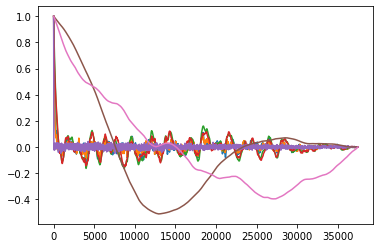

In [7]:
# autocorr.integrated_time
for i in range(pos_run1.shape[1]):
    xc = autocorr.function_1d(pos_run1[:, i])
    plt.plot(xc)
    
plt.savefig('result/' + name + '/autocor_linreg.png')

In [27]:
dd = np.concatenate((pos_run1,pos_run2,pos_run3,pos_run4,pos_run5), axis=0)

In [28]:
print(dd.shape)

(187500, 7)


In [30]:
from chainconsumer import ChainConsumer
c = ChainConsumer()
for i in range(data.shape[2]):
    c.add_chain(dd[:, i], walkers = 5)


# Now, lets check our convergence using the Gelman-Rubin statistic
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print(gelman_rubin_converged)

Gelman-Rubin Statistic values for chain Chain 0
0: 1.00100 (Passed)
Gelman-Rubin Statistic values for chain Chain 1
0: 1.00085 (Passed)
Gelman-Rubin Statistic values for chain Chain 2
0: 1.00273 (Passed)
Gelman-Rubin Statistic values for chain Chain 3
0: 1.00306 (Passed)
Gelman-Rubin Statistic values for chain Chain 4
0: 1.00003 (Passed)
Gelman-Rubin Statistic values for chain Chain 5
0: 2.85574 (Failed)
Gelman-Rubin Statistic values for chain Chain 6
0: 1.88701 (Failed)
False


[ 1.13344505 -1.43395402 -0.38679243 ... -0.99674109 -0.48102444
  0.92237575]
